## Densidad de materia oscura

### Informacion por utilizar

In [12]:
#importamos las herramientas necesarias
import pynbody
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy import optimize
import scipy.stats
from astropy import units as unit
import sys
from matplotlib.animation import FuncAnimation
import funciones_dark_matter as fdm

In [13]:
#importamos los datos
data_nuevo = '/media/danna01/Disk/SNAPSHOTS/Galaxias_Nuevas'
data_viejo = '/media/danna01/Disk/SNAPSHOTS/Galaxias_Viejas'
#datadir = '/media/juan/Pesquisa/Simulations_Chris_2021'

A continuacion se lista la informacion importante para este notebook

 1) Masa Total de materia oscura
 
 2) Densidad de la materia oscura

In [14]:
# Estos son los diccionarios que definen los limites que seran utilizados para los plots de las galaxias para los
# calculos de densidad de materia oscura y la masa acumulada a diferentes radios para la amteria oscura tambien
dicti = {}
galaxies = ['G0', 'G1', 'G2', 'G3']
# Estos son los limites para graficar la masa acumulada y la densidad; sus valores corresponden a 10 veces el valor
# del scale - lenght de cada galaxia.
limites_materia_oscura = {'G0':(0,55), 'G1':(0,75), 'G2':(0,95), 'G3':(0,140)} #kpc

In [15]:
# Masa acumulada de materia oscura
def accumulated_mass(pos,mass,n,limits):
    # Para las simulaciones nuevas
    r = np.sqrt((pos**2).sum(axis=1))
    # histograma acumulado
    histo_acum = scipy.stats.cumfreq(r, n, limits, weights=mass)
    # hallamos los radios manualmente
    positions = histo_acum[1]+ np.arange(1,n+1) * histo_acum[2]
    
    return positions, histo_acum[0]

In [16]:
# Funcion densidad
def density_dm(data):
    x,y = accumulated_mass(data.dm['pos'],data.dm['mass'],n=int(limites_materia_oscura[gal][1]*4),limits=limites_materia_oscura[gal])
    
    x2 = np.roll(x,1)
    x2[0]=0
    # promedio del radio
    bins_middle = (x + x2 )/2
    
    x_cubico = x**3
    x_cubico_2 = np.roll(x_cubico,1)
    x_cubico_2[0]=0
   
    y2 = np.roll(y,1)
    y2[0]=0
  
    shell_mass = y - y2
    
    # \rho = (4/3)*pi*R^3
    dens = 3* shell_mass / ((4*np.pi)* (x_cubico - x_cubico_2) )
    
    return bins_middle, shell_mass, dens

In [28]:
def plot_mass(filename):
    fig = plt.figure(figsize=(10, 7))
    try:  
        #for snap in np.arange(int(numero1),int(numero2),200): 
            #snap = str(snap).zfill(3) 
        data_viejo_ruta = pynbody.load(data_viejo+'/'+gal+'/snapshot_'+snap+'.hdf5')
        binsold, massold = accumulated_mass(data_viejo_ruta.dm['pos'],data_viejo_ruta.dm['mass'],
                                            n=int(limites_materia_oscura[gal][1]*4),limits=limites_materia_oscura[gal])
        plt.plot(binsold,massold,'-r', label= 'Old Galaxies '+gal+'/'+snap)
   
    except:
        pass
        
    data_nuevo_ruta = pynbody.load(data_nuevo+'/'+gal+'/snapshot_'+snap+'.hdf5')
    binsnew, massnew = accumulated_mass(data_nuevo_ruta.dm['pos'],data_nuevo_ruta.dm['mass'],
                                        n=int(limites_materia_oscura[gal][1]*4),limits=limites_materia_oscura[gal]) 
    
    plt.plot(binsnew,massnew,'-k',label= 'New Galaxies '+gal+'/'+snap)
    plt.title('Masa acumulada de la Materia Oscura', fontsize= 18)
    plt.xlabel('Radio [Kpc]',fontsize=20)
    plt.ylabel('Masa Acumulada (Msol)')
    plt.legend()
    plt.grid()
    plt.savefig(filename)
    plt.clf()
    plt.close()

In [30]:
# Plots densidad.
def plot_density(filename):
    
    try:  
        #for snap in np.arange(int(numero1),int(numero2),200): 
        #snap = str(snap).zfill(3) 
        data_viejo_ruta = pynbody.load(data_viejo+'/'+gal+'/snapshot_'+snap+'.hdf5')
        bins_middle_old, shell_mass_old, dens_old  = density_dm(data_viejo_ruta)
        plt.plot(bins_middle_old, np.log10(dens_old), '-r', label= 'Old Galaxies '+gal+'/'+snap)
    
    except:
        pass
        
    data_nuevo_ruta = pynbody.load(data_nuevo+'/'+gal+'/snapshot_'+snap+'.hdf5')
    bins_middle_new, shell_mass_new, dens_new  = density_dm(data_nuevo_ruta)
    
    fig = plt.figure(figsize=(10, 7))
    
    plt.plot(bins_middle_new, np.log10(dens_new), '-k', label= 'New Galaxies '+gal+'/'+snap)
    
    plt.title('Perfil de densidad de materia oscura', fontsize = 18)
    plt.xlabel('Radio [Kpc]', fontsize = 20)
    plt.ylabel(r'$\rho$ [$1x10^{10}$ Msol/$kpc^{2}$]', fontsize = 20)
    plt.legend()
    plt.grid()
    plt.savefig(filename)
    plt.clf()
    plt.close()

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No un

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(


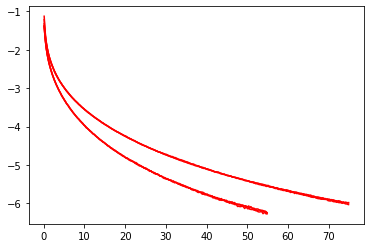

In [31]:
for gal in ['G0','G1']:
    for snap in np.arange(100,700,200): 
        snap = str(snap).zfill(3)
        plot_mass('prueba/Materia_Oscura_Masa_Acumulada_'+gal+'_dm_'+snap+'.jpg')
        plot_density('prueba/Materia_Oscura_Densidad_'+gal+'_dm_'+snap+'.jpg')

### Funciones Comparaciones

#### Relacion masa acumulada vs. radio

In [10]:
# Masa acumulada de materia oscura
def accumulated_mass(posnew,massnew,posold, massold,n,limits):
    # Para las simulaciones nuevas
    rnew = np.sqrt((posnew**2).sum(axis=1))
    # histograma acumulado
    histo_acum_new = scipy.stats.cumfreq(rnew, n, limits, weights=massnew)
    # hallamos los radios manualmente
    positionsnew = histo_acum_new[1]+ np.arange(1,n+1) * histo_acum_new[2]
    # Para las simulaciones viejas
    rold = np.sqrt((posold**2).sum(axis=1))
    histo_acum_old = scipy.stats.cumfreq(rold, n, limits, weights=massold)
    positionsold = histo_acum_old[1]+ np.arange(1,n+1) * histo_acum_old[2]
    
    return positionsnew, histo_acum_new[0], positionsold, histo_acum_old[0]

#### Relacion densidad vs. radio

In [11]:
# Funcion densidad
def density_dm(xnew,ynew,xold,yold):
    xnew,ynew, xold, yold = accumulated_mass(data_nuevo_ruta.dm['pos'],data_nuevo_ruta.dm['mass'],data_viejo_ruta.dm['pos'],data_viejo_ruta.dm['mass'],n=int(limites_materia_oscura[gal][1]*4),limits=limites_materia_oscura[gal])
    # Para las simulaciones nuevas
    # np.roll re acomoda los datos desplazandolos una posicion
    x2new = np.roll(xnew,1)
    x2new[0]=0
    # promedio del radio
    bins_middle_new = (xnew + x2new )/2
    
    x_cubico_new = xnew**3
    x_cubico_2_new = np.roll(x_cubico_new,1)
    x_cubico_2_new[0]=0
   
    y2new = np.roll(ynew,1)
    y2new[0]=0
  
    shell_mass_new = ynew - y2new
    
    # \rho = (4/3)*pi*R^3
    densnew = 3* shell_mass_new / ((4*np.pi)* (x_cubico_new - x_cubico_2_new) )
    
    # Para las simulaciones viejas
    x2old = np.roll(xold,1)
    x2old[0]=0
    bins_middle_old = (xold + x2old )/2
    
    x_cubico_old = xold**3
    x_cubico_2_old = np.roll(x_cubico_old,1)
    x_cubico_2_old[0]=0
    
    y2old = np.roll(yold,1)
    y2old[0]=0
   
    shell_mass_old = yold - y2old
    
    # \rho = (4/3)*pi*R^3
    densold = 3* shell_mass_old / ((4*np.pi)* (x_cubico_old - x_cubico_2_old) ) 
    
    return bins_middle_new, shell_mass_new, densnew, bins_middle_old, shell_mass_old, densold

#### Funciones para las graficas

In [12]:
# Plots masa acumulada.
def plot_mass(binsnew,massnew,binsold,massold,filename,):
    fig = plt.figure(figsize=(10, 7))
    
    plt.plot(binsnew,massnew,'-k',label= 'New Galaxies '+gal+'/'+snap)
    plt.plot(binsold,massold,'-r', label= 'Old Galaxies')
    
    plt.title('Masa acumulada de la Materia Oscura', fontsize= 18)
    plt.xlabel('Radio [Kpc]',fontsize=20)
    plt.ylabel('Masa Acumulada (Msol)')
    plt.legend()
    plt.grid()
    plt.savefig(filename)
    plt.clf()
    plt.close()

In [13]:
# Plots densidad.
def plot_density(binsnew,densnew,binsold, densold, filename,):
    
    fig = plt.figure(figsize=(10, 7))
    
    plt.plot(binsnew, np.log10(densnew), '-k', label= 'New Galaxies '+gal+'/'+snap)
    plt.plot(binsold, np.log10(densold), '-r', label= 'Old Galaxies')
   
    plt.title('Perfil de densidad de materia oscura', fontsize = 18)
    plt.xlabel('Radio [Kpc]', fontsize = 20)
    plt.ylabel(r'$\rho$ [$1x10^{10}$ Msol/$kpc^{2}$]', fontsize = 20)
    plt.legend()
    plt.grid()
    plt.savefig(filename)
    plt.clf()
    plt.close()

#### Generacion de graficas

In [14]:
# Generacion de plots.
minsnap = 100
maxsnap = 700
stepsnap = 200

# definimos la fuente de los datos, para esto usamos los diccionarios que definimos mas arriba
for gal in ['G0','G1']:
    for snap in np.arange(minsnap,maxsnap,stepsnap): 
        snap = str(snap).zfill(3)
        # Aca definimos la ruta en la cual estan almacenados los snapshots
        data_nuevo_ruta = pynbody.load(data_nuevo+'/'+gal+'/snapshot_'+snap+'.hdf5')
        data_viejo_ruta = pynbody.load(data_viejo+'/'+gal+'/snapshot_'+snap+'.hdf5')
        
        
        # Aca vamos a generar cada uno de los plots, para lo cual primero debemos definir
        # cada una de las funciones de masa acumulada y densidad.
        bins_new, mass_new, bins_old, mass_old = accumulated_mass(data_nuevo_ruta.dm['pos'],data_nuevo_ruta.dm['mass'],data_viejo_ruta.dm['pos'],data_viejo_ruta.dm['mass'],n=int(limites_materia_oscura[gal][1]*4),limits=limites_materia_oscura[gal])
    
        bins_middle_new, shell_mass_new, dens_new, bins_middle_old, shell_mass_old, dens_old  = density_dm(bins_new, mass_new, bins_old, mass_old)
      
        plot_mass(bins_new,mass_new,bins_old,mass_old,filename='Materia_oscura/Comparaciones/Materia_Oscura_Acumulada_'+gal+'_dm_'+snap+'.jpg')
        
        plot_density(bins_middle_new,dens_new,bins_middle_old,dens_old,filename='Materia_oscura/Comparaciones/Materia_Oscura_Densidad_'+gal+'_dm_'+snap+'.jpg')

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No un

### Funciones Materia Oscura Galaxias Nuevas: G0 y G1

#### Relacion masa acumulada vs. radio

In [36]:
# Masa acumulada de la materia oscura

def accumulated_mass_old(pos,mass,n,limits):
    
    r = np.sqrt((pos**2).sum(axis=1))
    # histograma acumulado
    histo_acum = scipy.stats.cumfreq(r, n, limits, weights=mass)
    # hallamos los radios manualmente
    positions = histo_acum[1]+ np.arange(1,n+1) * histo_acum[2]
    r = np.sqrt((pos**2).sum(axis=1))
  
    return positions, histo_acum[0]

#### Relacion densidad vs. radio

In [37]:
# Funcion de densidad
def density_dm_old(x,y,xold1,yold1,xold3,yold3,xold5,yold5):
    # Simulaciones nuevas G0 y G1
    x,y = accumulated_mass_old(data_nuevo_ruta.dm['pos'],data_nuevo_ruta.dm['mass'],n=int(limites_materia_oscura[gal][1]*4),limits=limites_materia_oscura[gal])
    # np.roll re acomoda los datos desplazandolos una posicion
    x2 = np.roll(x,1)
    x2[0]=0
    # promedio del radio
    bins_middle = (x + x2 )/2
    
    x_cubico = x**3
    x_cubico_2 = np.roll(x_cubico,1)
    x_cubico_2[0]=0
    
    y2 = np.roll(y,1)
    y2[0]=0
    shell_mass = y - y2
    
    # \rho = (4/3)*pi*R^3
    dens = 3* shell_mass / ((4*np.pi)* (x_cubico - x_cubico_2) ) 
    
    # Simulaciones viejas: snapshot 100
    xold1,yold1 = accumulated_mass_old(data_viejo_100.dm['pos'],data_viejo_100.dm['mass'],n=int(limites_materia_oscura[gal][1]*4),limits=limites_materia_oscura[gal])
    # np.roll re acomoda los datos desplazandolos una posicion
    xold12 = np.roll(xold1,1)
    xold12[0]=0
    # promedio del radio
    bins_middleold1 = (xold1 + xold12 )/2
    
    x_cubicoold1= xold1**3
    x_cubico_2old1 = np.roll(x_cubicoold1,1)
    x_cubico_2old1[0]=0
    
    yold12 = np.roll(yold1,1)
    yold12[0]=0
    shell_massold1 = yold1 - yold12
    
    # \rho = (4/3)*pi*R^3
    densold1 = 3* shell_massold1 / ((4*np.pi)* (x_cubicoold1 - x_cubico_2old1) ) 
    
    # Simulaciones viejas: snapshot 300
    xold3,yold3 = accumulated_mass_old(data_viejo_300.dm['pos'],data_viejo_300.dm['mass'],n=int(limites_materia_oscura[gal][1]*4),limits=limites_materia_oscura[gal])
    # np.roll re acomoda los datos desplazandolos una posicion
    xold32 = np.roll(xold3,1)
    xold32[0]=0
    # promedio del radio
    bins_middleold3 = (xold3 + xold32 )/2
    
    x_cubicoold3 = xold3**3
    x_cubico_2old3 = np.roll(x_cubicoold3,1)
    x_cubico_2old3[0]=0
    
    yold32 = np.roll(yold3,1)
    yold32[0]=0
    shell_massold3 = yold3 - yold32
    
    # \rho = (4/3)*pi*R^3
    densold3 = 3* shell_massold3 / ((4*np.pi)* (x_cubicoold3 - x_cubico_2old3) ) 
    
    # Simulaciones viejas: snapshot 500
    xold5,yold5 = accumulated_mass_old(data_viejo_500.dm['pos'],data_viejo_500.dm['mass'],n=int(limites_materia_oscura[gal][1]*4),limits=limites_materia_oscura[gal])
    # np.roll re acomoda los datos desplazandolos una posicion
    xold52 = np.roll(xold5,1)
    xold52[0]=0
    # promedio del radio
    bins_middleold5 = (xold5 + xold52 )/2
    
    x_cubicoold5 = xold5**3
    x_cubico_2old5 = np.roll(x_cubicoold5,1)
    x_cubico_2old5[0]=0
    
    yold52 = np.roll(yold5,1)
    yold52[0]=0
    shell_massold5 = yold5 - yold52
    
    # \rho = (4/3)*pi*R^3
    densold5 = 3* shell_massold5 / ((4*np.pi)* (x_cubicoold5 - x_cubico_2old5) ) 

    return bins_middle, shell_mass, dens, bins_middleold1, shell_massold1, densold1, bins_middleold3, shell_massold3, densold3, bins_middleold5, shell_massold5, densold5

### Funciones Materia Oscura Galaxias Nuevas: G2 y G3

#### Relacion masa acumulada vs. radio

In [38]:
# Masa acumulada de la materia oscura

def accumulated_mass_new(pos,mass,n,limits):
    
    r = np.sqrt((pos**2).sum(axis=1))
    # histograma acumulado
    histo_acum = scipy.stats.cumfreq(r, n, limits, weights=mass)
    # hallamos los radios manualmente
    positions = histo_acum[1]+ np.arange(1,n+1) * histo_acum[2]
    r = np.sqrt((pos**2).sum(axis=1))
  
    return positions, histo_acum[0]

#### Relacion densidad vs. radio

In [39]:
# Funcion de densidad
def density_dm_new(x,y):
    x,y = accumulated_mass_new(data_nuevo_ruta.dm['pos'],data_nuevo_ruta.dm['mass'],n=int(limites_materia_oscura[gal][1]*4),limits=limites_materia_oscura[gal])
    # np.roll re acomoda los datos desplazandolos una posicion
    x2 = np.roll(x,1)
    x2[0]=0
    # promedio del radio
    bins_middle = (x + x2 )/2
    
    x_cubico = x**3
    x_cubico_2 = np.roll(x_cubico,1)
    x_cubico_2[0]=0
    
    y2 = np.roll(y,1)
    y2[0]=0
    shell_mass = y - y2
    
    # \rho = (4/3)*pi*R^3
    dens = 3* shell_mass / ((4*np.pi)* (x_cubico - x_cubico_2) ) 

    return bins_middle, shell_mass, dens

#### Funciones para las graficas G0 y G1

In [40]:
# Plots de masa acumulada.
def plot_mass_old(bins,mass,binsold100,massold100,binsold300,massold300,binsold500,massold500,filename):
    fig = plt.figure(figsize=(10, 7))

    plt.plot(bins,mass,'-k',label= 'Simulacion Nueva '+gal+'/'+snap)
    plt.plot(binsold100,massold100,'-r', label= 'Old Galaxies '+gal+'/100')
    plt.plot(binsold300,massold300,'-g', label= 'Old Galaxies '+gal+'/300')
    plt.plot(binsold500,massold500,'-b', label= 'Old Galaxies '+gal+'/500')
    plt.legend()
    plt.title('Masa acumulada de la Materia Oscura', fontsize= 18)
    plt.xlabel('Radio [Kpc]',fontsize=20)
    plt.ylabel('Masa Acumulada (Msol)')
    plt.grid()
    plt.savefig(filename)
    plt.clf()
    plt.close()

In [41]:
# Plot para la densidad.
def plot_density_old(bins,dens,binsold1,densold1,binsold3,densold3,binsold5,densold5,filename):
    
    fig = plt.figure(figsize=(10, 7))
    
    plt.plot(bins, np.log10(dens), '-k',label= 'Simulacion Nueva '+gal+'/'+snap)
    plt.plot(binsold1, np.log10(densold1), '-r', label= 'Old Galaxies '+gal+'/100')
    plt.plot(binsold3, np.log10(densold3), '-g', label= 'Old Galaxies '+gal+'/300')
    plt.plot(binsold5, np.log10(densold5), '-b', label= 'Old Galaxies '+gal+'/500')
    plt.legend()
    plt.title('Perfil de densidad de materia oscura', fontsize = 18)
    plt.xlabel('Radio [Kpc]', fontsize = 20)
    plt.ylabel(r'$\rho$ [$1x10^{10}$ Msol/$kpc^{2}$]', fontsize = 20)
    plt.grid()
    plt.savefig(filename)
    plt.clf()
    plt.close()

#### Funciones para las graficas G2 y G3

In [42]:
# Plots de masa acumulada.
def plot_mass_new(bins,mass,filename):
    fig = plt.figure(figsize=(10, 7))

    plt.plot(bins,mass,'-k',label= 'Simulacion Nueva '+gal+'/'+snap)
    plt.legend()
    plt.title('Masa acumulada de la Materia Oscura', fontsize= 18)
    plt.xlabel('Radio [Kpc]',fontsize=20)
    plt.ylabel('Masa Acumulada (Msol)')
    plt.grid()
    plt.savefig(filename)
    plt.clf()
    plt.close()

In [43]:
# Plot para la densidad.
def plot_density_new(bins,dens,filename):
    
    fig = plt.figure(figsize=(10, 7))
    
    plt.plot(bins, np.log10(dens), '-k',label= 'Simulacion Nueva '+gal+'/'+snap)
    plt.legend()
    plt.title('Perfil de densidad de materia oscura', fontsize = 18)
    plt.xlabel('Radio [Kpc]', fontsize = 20)
    plt.ylabel(r'$\rho$ [$1x10^{10}$ Msol/$kpc^{2}$]', fontsize = 20)
    plt.grid()
    plt.savefig(filename)
    plt.clf()
    plt.close()

#### Generacion de graficas

In [46]:
# Generacion de plots

minsnap = 100
maxsnap = 700
stepsnap = 100

# definimos la fuente de los datos, para esto usamos los diccionarios que definimos mas arriba
for gal in ['G0','G1']:
    for snap in np.arange(minsnap,maxsnap,stepsnap): 
        snap = str(snap).zfill(3)
        # Aca definimos la ruta en la cual estan almacenados los snapshots
        data_nuevo_ruta = pynbody.load(data_nuevo+'/'+gal+'/snapshot_'+snap+'.hdf5')
        data_viejo_100 = pynbody.load(data_viejo+'/'+gal+'/snapshot_100.hdf5')
        data_viejo_300 = pynbody.load(data_viejo+'/'+gal+'/snapshot_300.hdf5')
        data_viejo_500 = pynbody.load(data_viejo+'/'+gal+'/snapshot_500.hdf5')
        
        # Aca vamos a generar cada uno de los plots, para lo cual primero debemos definir
        # cada una de las funciones de masa acumulada y densidad.
        bins, mass = accumulated_mass_old(data_nuevo_ruta.dm['pos'],data_nuevo_ruta.dm['mass'],n=int(limites_materia_oscura[gal][1]*4),limits=limites_materia_oscura[gal])
        binsold100,massold100 = accumulated_mass_old(data_viejo_100.dm['pos'],data_viejo_100.dm['mass'],n=int(limites_materia_oscura[gal][1]*4),limits=limites_materia_oscura[gal])
        binsold300,massold300 = accumulated_mass_old(data_viejo_300.dm['pos'],data_viejo_300.dm['mass'],n=int(limites_materia_oscura[gal][1]*4),limits=limites_materia_oscura[gal])
        binsold500,massold500 = accumulated_mass_old(data_viejo_500.dm['pos'],data_viejo_500.dm['mass'],n=int(limites_materia_oscura[gal][1]*4),limits=limites_materia_oscura[gal])
        
        # Aca utilizamos la funcion de densidad
        bins,shell,dens,bins1,shell1,dens1,bisn3,shell3,mass3,bins5,shell5,mass5 = density_dm_old(bins,mass,binsold100,massold100,binsold300,massold300,binsold500,massold500)
        
        # Aca se generan las graficas
        plot_mass_old(bins,mass,binsold100,massold100,binsold300,massold300,binsold500,massold500,filename='Materia_oscura/Materia_Oscura_Acumulada_'+gal+'_dm_'+snap+'.jpg')
       
        plot_density_old(bins,dens,bins1,dens1,bisn3,mass3,bins5,mass5,filename='Materia_oscura/Materia_Oscura_Densidad_'+gal+'_dm_'+snap+'.jpg')


for gal in ['G2','G3']:
    for snap in np.arange(minsnap,maxsnap,stepsnap): 
        snap = str(snap).zfill(3)
        # Aca definimos la ruta en la cual estan almacenados los snapshots
        data_nuevo_ruta = pynbody.load(data_nuevo+'/'+gal+'/snapshot_'+snap+'.hdf5')
        
        # Aca vamos a generar cada uno de los plots, para lo cual primero debemos definir
        # cada una de las funciones de masa acumulada y densidad.
        bins, mass = accumulated_mass_new(data_nuevo_ruta.dm['pos'],data_nuevo_ruta.dm['mass'],n=int(limites_materia_oscura[gal][1]*4),limits=limites_materia_oscura[gal])
        
        bins_middle, shell_mass, dens = density_dm_new(bins, mass)
        
        plot_mass_new(bins,mass,filename='Materia_oscura/Materia_Oscura_Acumulada_'+gal+'_dm_'+snap+'.jpg')
       
        plot_density_new(bins_middle,dens,filename='Materia_oscura/Materia_Oscura_Densidad_'+gal+'_dm_'+snap+'.jpg')

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No un

<ipython-input-43-04ba41947f46>:6: RuntimeWarning: divide by zero encountered in log10
  plt.plot(bins, np.log10(dens), '-k',label= 'Simulacion Nueva '+gal+'/'+snap)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
 

#### Graficos Logaritmicos

In [45]:
help(plt.loglog)

Help on function loglog in module matplotlib.pyplot:

loglog(*args, **kwargs)
    Make a plot with log scaling on both the x and y axis.
    
    Call signatures::
    
        loglog([x], y, [fmt], data=None, **kwargs)
        loglog([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    This is just a thin wrapper around `.plot` which additionally changes
    both the x-axis and the y-axis to log scaling. All of the concepts and
    parameters of plot can be used here as well.
    
    The additional parameters *base*, *subs* and *nonpositive* control the
    x/y-axis properties. They are just forwarded to `.Axes.set_xscale` and
    `.Axes.set_yscale`. To use different properties on the x-axis and the
    y-axis, use e.g.
    ``ax.set_xscale("log", base=10); ax.set_yscale("log", base=2)``.
    
    Parameters
    ----------
    base : float, default: 10
        Base of the logarithm.
    
    subs : sequence, optional
        The location of the minor ticks. If *None*, reasonable l

In [48]:
# Masa acumulada de la materia oscura

def accumulated_mass_log(pos,mass,n,limits):
    
    r = np.sqrt((pos**2).sum(axis=1))
    # histograma acumulado
    histo_acum = scipy.stats.cumfreq(r, n, limits, weights=mass)
    # hallamos los radios manualmente
    positions = histo_acum[1]+ np.arange(1,n+1) * histo_acum[2]
    r = np.sqrt((pos**2).sum(axis=1))
  
    return positions, histo_acum[0]

In [49]:
# Funcion de densidad
def density_dm_log(x,y):
    x,y = accumulated_mass_new(data_nuevo_ruta.dm['pos'],data_nuevo_ruta.dm['mass'],n=int(limites_materia_oscura[gal][1]*4),limits=limites_materia_oscura[gal])
    # np.roll re acomoda los datos desplazandolos una posicion
    x2 = np.roll(x,1)
    x2[0]=0
    # promedio del radio
    bins_middle = (x + x2 )/2
    
    x_cubico = x**3
    x_cubico_2 = np.roll(x_cubico,1)
    x_cubico_2[0]=0
    
    y2 = np.roll(y,1)
    y2[0]=0
    shell_mass = y - y2
    
    # \rho = (4/3)*pi*R^3
    dens = 3* shell_mass / ((4*np.pi)* (x_cubico - x_cubico_2) ) 

    return bins_middle, shell_mass, dens

In [50]:
# Plot para la densidad.
def plot_density_log(bins,dens,filename):
    
    fig = plt.figure(figsize=(10, 7))
    
    plt.loglog(bins, dens, '-k',label= 'Simulacion Nueva '+gal+'/'+snap)
    plt.legend()
    plt.title('Perfil de densidad de materia oscura', fontsize = 18)
    plt.xlabel('Radio [Kpc]', fontsize = 20)
    plt.ylabel(r'$\rho$ [$1x10^{10}$ Msol/$kpc^{2}$]', fontsize = 20)
    plt.grid()
    plt.savefig(filename)
    plt.clf()
    plt.close()

In [51]:
minsnap = 100
maxsnap = 200
stepsnap = 100
for gal in ['G0','G1','G2','G3']:
    for snap in np.arange(minsnap,maxsnap,stepsnap): 
        snap = str(snap).zfill(3)
        # Aca definimos la ruta en la cual estan almacenados los snapshots
        data_nuevo_ruta = pynbody.load(data_nuevo+'/'+gal+'/snapshot_'+snap+'.hdf5')
        
        # Aca vamos a generar cada uno de los plots, para lo cual primero debemos definir
        # cada una de las funciones de masa acumulada y densidad.
        bins, mass = accumulated_mass_log(data_nuevo_ruta.dm['pos'],data_nuevo_ruta.dm['mass'],n=int(limites_materia_oscura[gal][1]*4),limits=limites_materia_oscura[gal])
        
        bins_middle, shell_mass, dens = density_dm_log(bins, mass)
       
        plot_density_log(bins_middle,dens,filename='Materia_oscura/Materia_Oscura_Densidad_Log'+gal+'_dm_'+snap+'.jpg')

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No un

In [ ]:
10$^{10}$ $M_\odot$
$h_\star$
# graficar los 600 perfiles de densidad de estrellas y gas
# graficar hasta 20 scale-lengths para probar o hasta donde alcance el valor asintótico
# los radios pueden ser de 200 en 200 pc
plt.plot(x,y,'-',color=gray,alpha=0.5)

# Y luego para mejorarlos lo haremos con la media y la desviación estándar de las 600 curvas
# ESPERAR!